# Task 1

## Task 1.1

In [5]:
import numpy as np
from CartPole import *
from sklearn import linear_model

In [6]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial', variable, 'on cart dynamics'),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

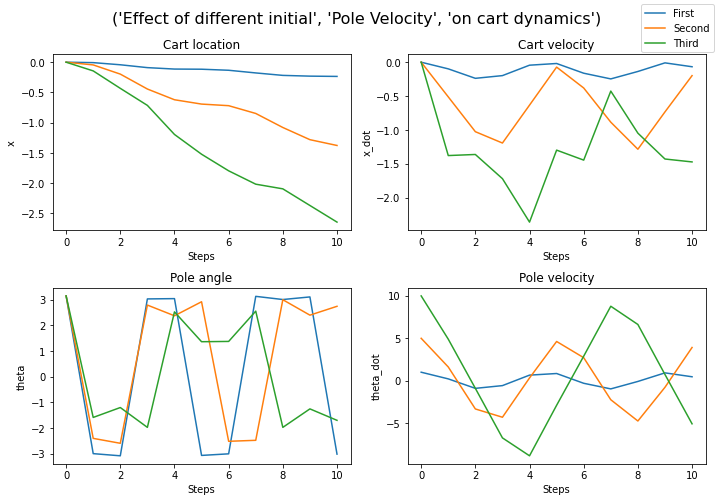

In [38]:
history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=True,variable = 'Pole Velocity')


### Complete rotation of pendulum

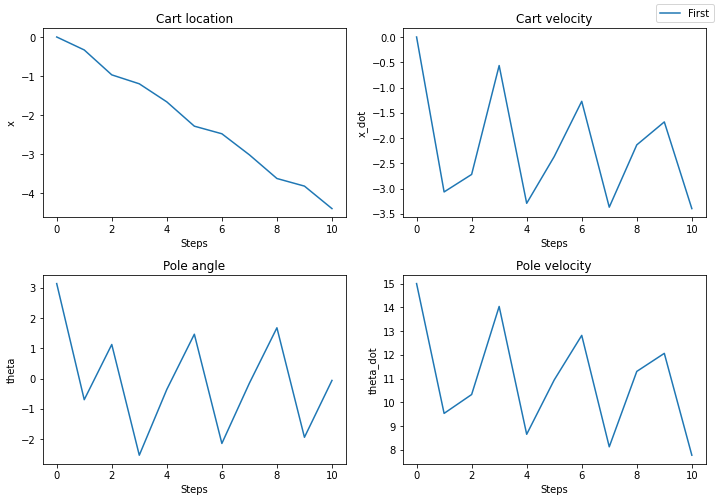

In [8]:
history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=True)

## Task 1.2

In [9]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
print(initialize)

[  0.41152882   9.72311194   2.51728252 -11.73266311]


In [10]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [11]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


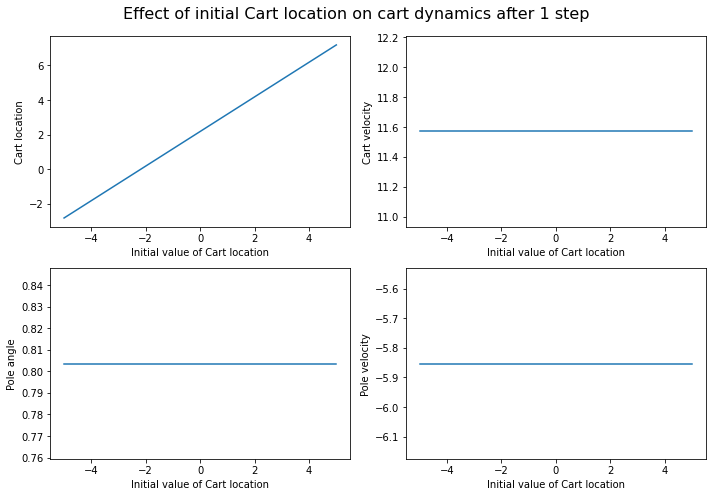

In [12]:
one_step(0,[-5,5],15)

### Vary cart velocity

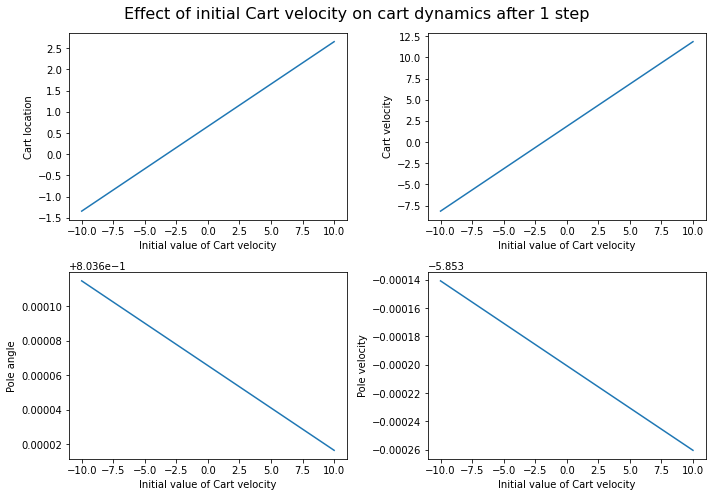

In [13]:
one_step(1,[-10,10],15)

### Vary pole angle

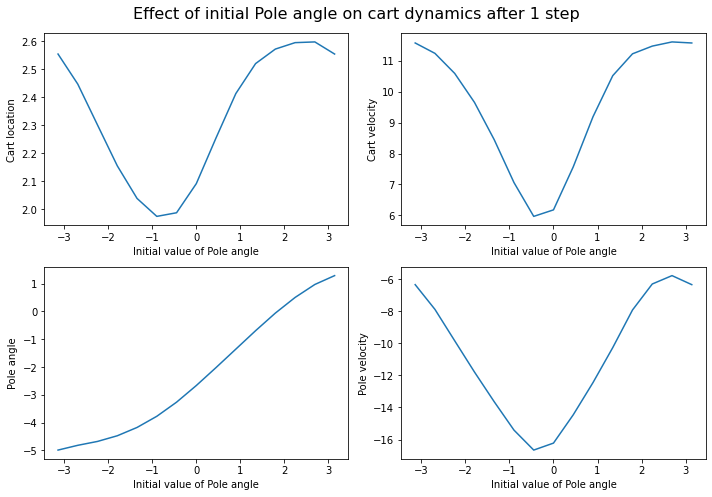

In [14]:
one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

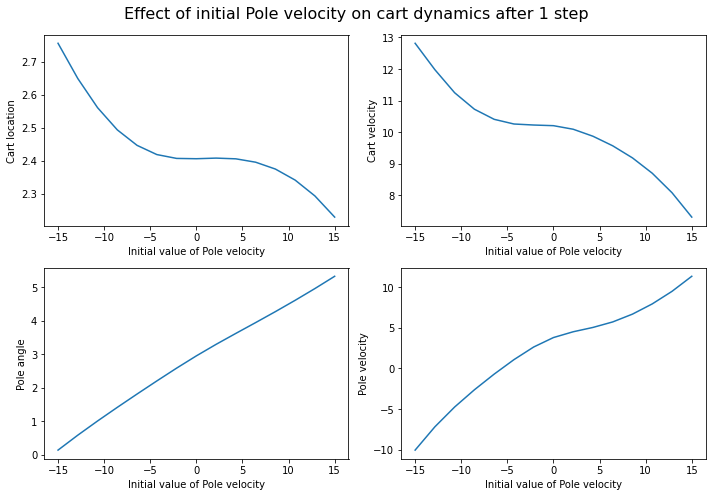

In [15]:
one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [16]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

### (i) Scans of single relationships

### Vary cart location

array([[ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437],
       [ 2.18836717,  1.84735139, -1.71366478,  5.87940437]])

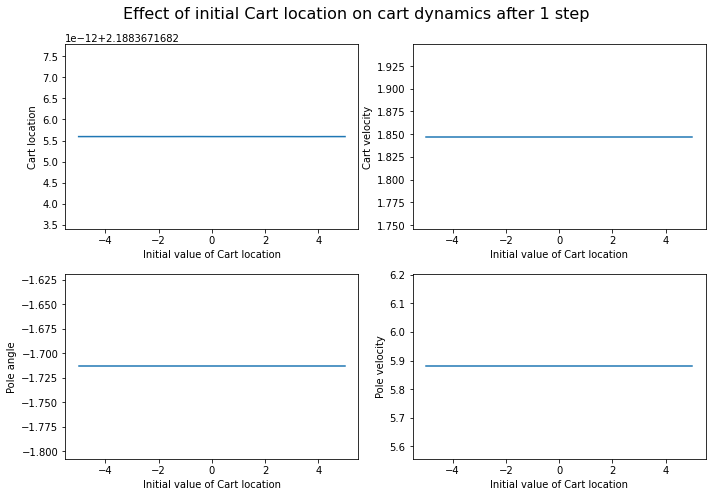

In [17]:
one_step_difference(0,[-5,5],15)

### Vary cart velocity

array([[-1.75605275,  1.84933985, -1.71356796,  5.87952239],
       [-1.47035313,  1.84919582, -1.71357497,  5.87951384],
       [-1.18465351,  1.8490518 , -1.71358199,  5.87950528],
       [-0.89895389,  1.84890777, -1.713589  ,  5.87949672],
       [-0.61325427,  1.84876375, -1.71359601,  5.87948817],
       [-0.32755465,  1.84861972, -1.71360303,  5.87947962],
       [-0.04185503,  1.8484757 , -1.71361004,  5.87947107],
       [ 0.24384459,  1.84833167, -1.71361705,  5.87946252],
       [ 0.52954422,  1.84818764, -1.71362406,  5.87945397],
       [ 0.81524384,  1.84804362, -1.71363108,  5.87944542],
       [ 1.10094346,  1.84789959, -1.71363809,  5.87943688],
       [ 1.38664308,  1.84775556, -1.7136451 ,  5.87942834],
       [ 1.6723427 ,  1.84761154, -1.71365211,  5.87941979],
       [ 1.95804232,  1.84746751, -1.71365912,  5.87941125],
       [ 2.24374194,  1.84732348, -1.71366613,  5.87940272]])

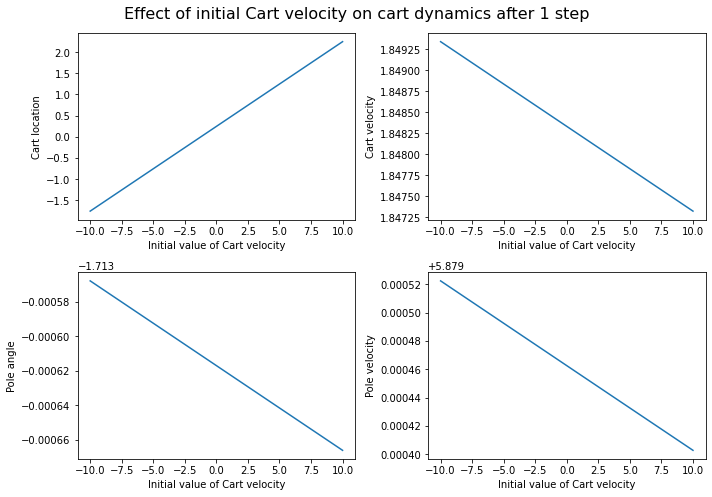

In [18]:
one_step_difference(1,[-10,10],15)

### Vary pole angle


array([[ 2.14255673,  1.85498968, -1.85078949,  5.39655346],
       [ 2.03526784,  1.51912082, -2.12794767,  3.85272696],
       [ 1.88923688,  0.87024262, -2.43662639,  1.89400047],
       [ 1.74368429, -0.06697858, -2.68169126, -0.05406126],
       [ 1.62737268, -1.2741259 , -2.83112865, -1.90922521],
       [ 1.56336943, -2.66116245, -2.87781229, -3.67875331],
       [ 1.57628064, -3.75574253, -2.81848883, -4.92538055],
       [ 1.68024786, -3.54522005, -2.66722365, -4.49009854],
       [ 1.84365287, -2.15447084, -2.46828027, -2.72529611],
       [ 2.00152858, -0.53238483, -2.25403163, -0.71479155],
       [ 2.10848598,  0.79714932, -2.03925883,  1.46802936],
       [ 2.16025394,  1.50449056, -1.8542555 ,  3.81543721],
       [ 2.1832252 ,  1.75381387, -1.73937801,  5.43711386],
       [ 2.18578769,  1.88910444, -1.72060917,  5.95959541],
       [ 2.14255673,  1.85498968, -1.85078949,  5.39655346]])

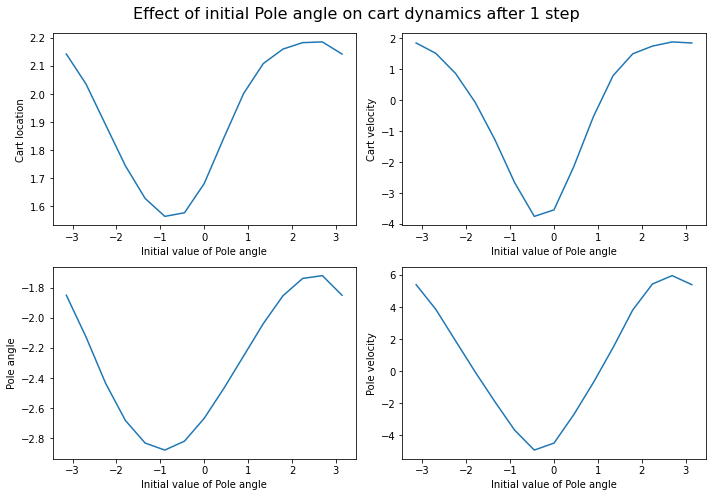

In [19]:
one_step_difference(2,[-np.pi,np.pi],15)


### Vary pole velocity

array([[ 2.34405731,  3.09315167, -2.38397037,  4.95378063],
       [ 2.23730923,  2.25518246, -1.93820576,  5.67708962],
       [ 2.14897083,  1.52429027, -1.51497454,  5.96861083],
       [ 2.08162731,  1.0022373 , -1.10775276,  5.94210833],
       [ 2.03472653,  0.68194292, -0.7103713 ,  5.72475919],
       [ 2.00682864,  0.53349869, -0.31984645,  5.3598736 ],
       [ 1.99517175,  0.50104168,  0.06202479,  4.77374071],
       [ 1.99423812,  0.48050869,  0.42823561,  3.79164021],
       [ 1.99609082,  0.36738735,  0.77259437,  2.36127885],
       [ 1.99390542,  0.14536305,  1.0995298 ,  0.75072333],
       [ 1.98370067, -0.15788752,  1.42148787, -0.7157115 ],
       [ 1.96292678, -0.54121291,  1.74876288, -1.89843938],
       [ 1.92946281, -1.027324  ,  2.08655547, -2.78516269],
       [ 1.88145613, -1.64517065,  2.43743197, -3.383831  ],
       [ 1.817356  , -2.41815375,  2.80374667, -3.67505866]])

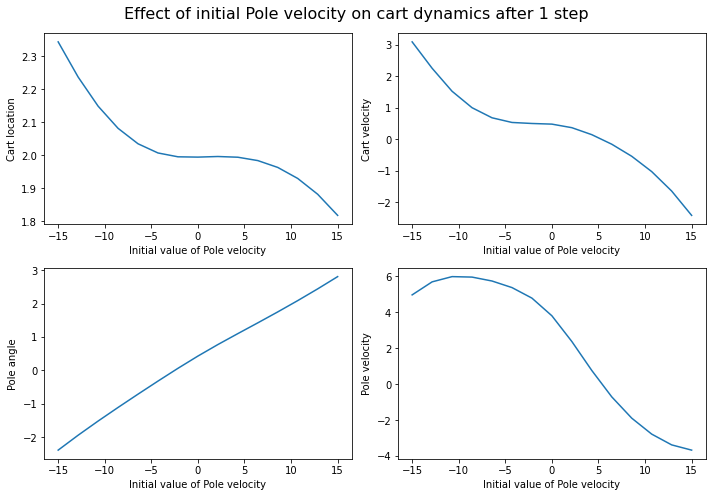

In [20]:
one_step_difference(3,[-15,15],15)

### (ii) Contour plots

In [21]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
x_range_for_index = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_x_pair = []
    for index in index_pair:
        range_x_pair.append(x_range_for_index[index])
    return range_x_pair

def contours_of_pairs(index_pair, range_x_pair):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_x_pair
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

_____________________Plots of Cart location vs Cart velocity_____________________


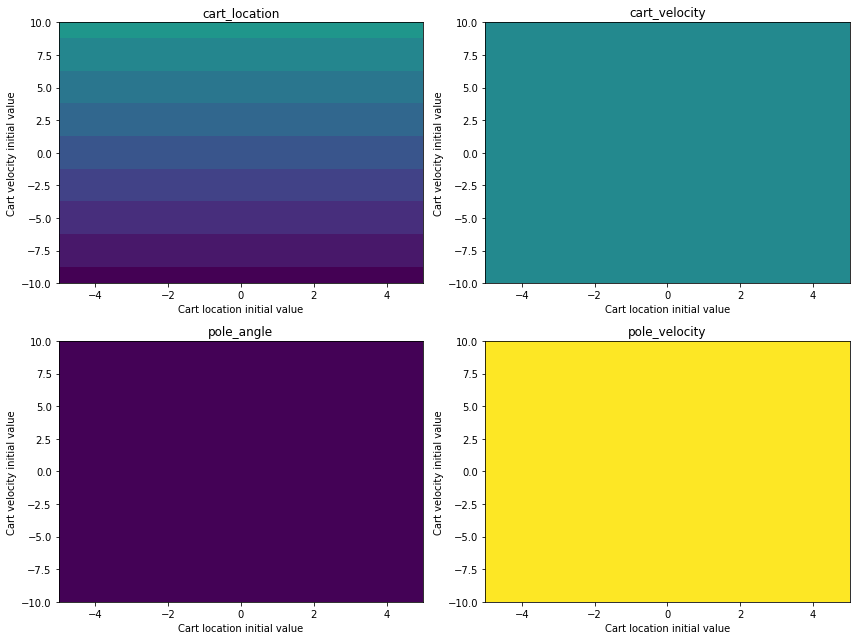

_____________________Plots of Cart location vs Pole angle_____________________


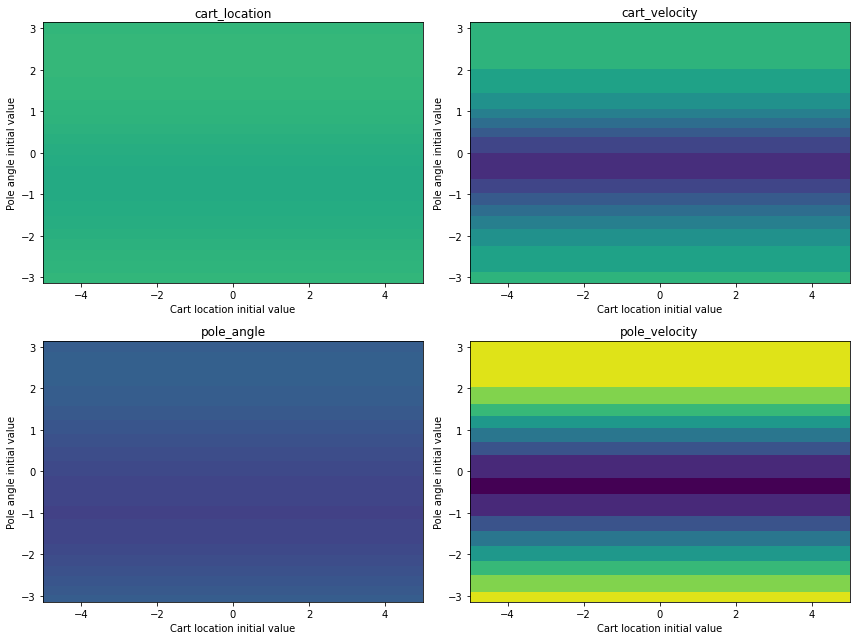

_____________________Plots of Cart location vs Pole velocity_____________________


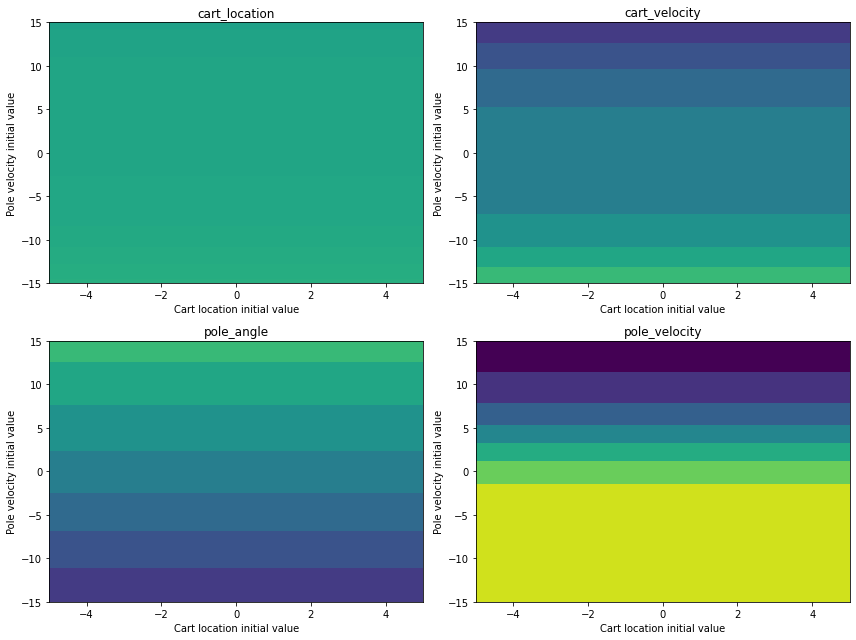

_____________________Plots of Cart velocity vs Pole angle_____________________


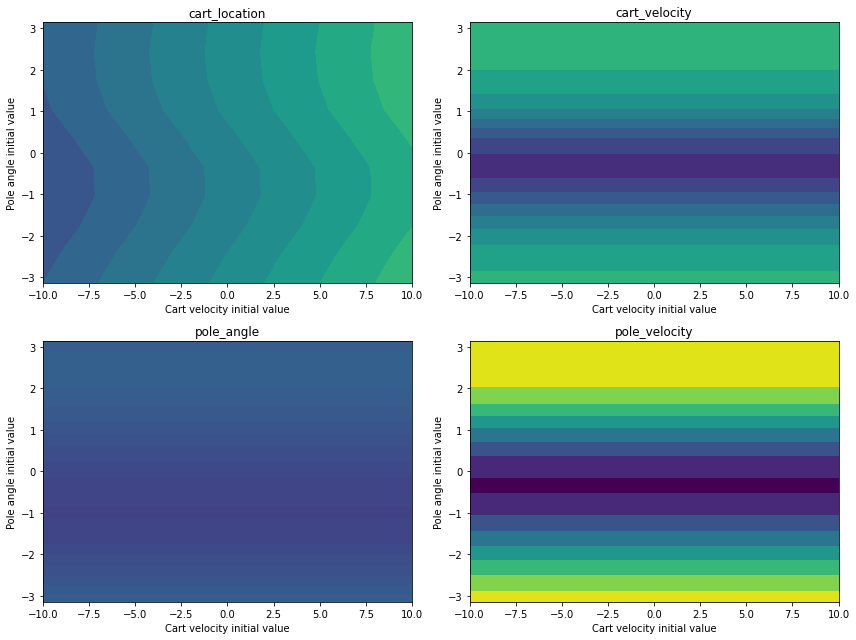

_____________________Plots of Cart velocity vs Pole velocity_____________________


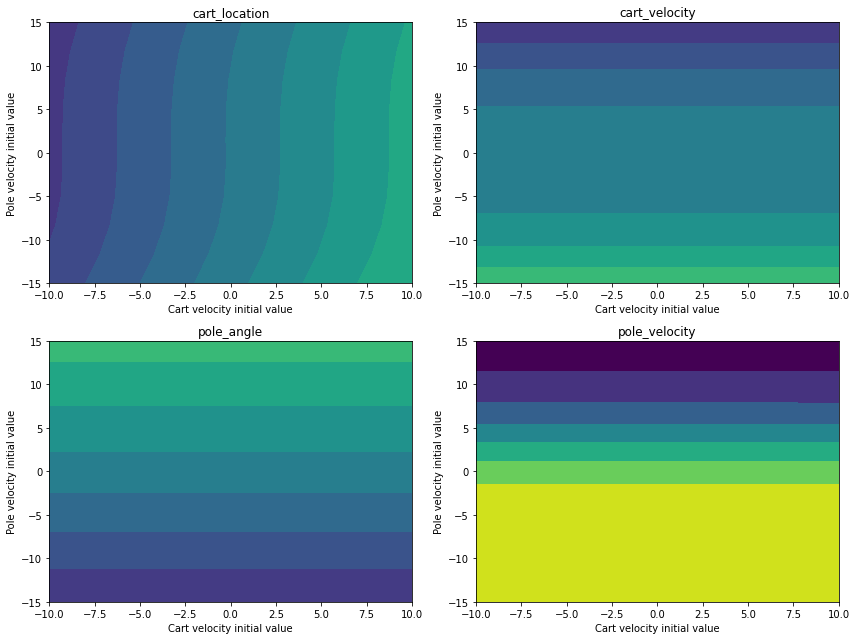

_____________________Plots of Pole angle vs Pole velocity_____________________


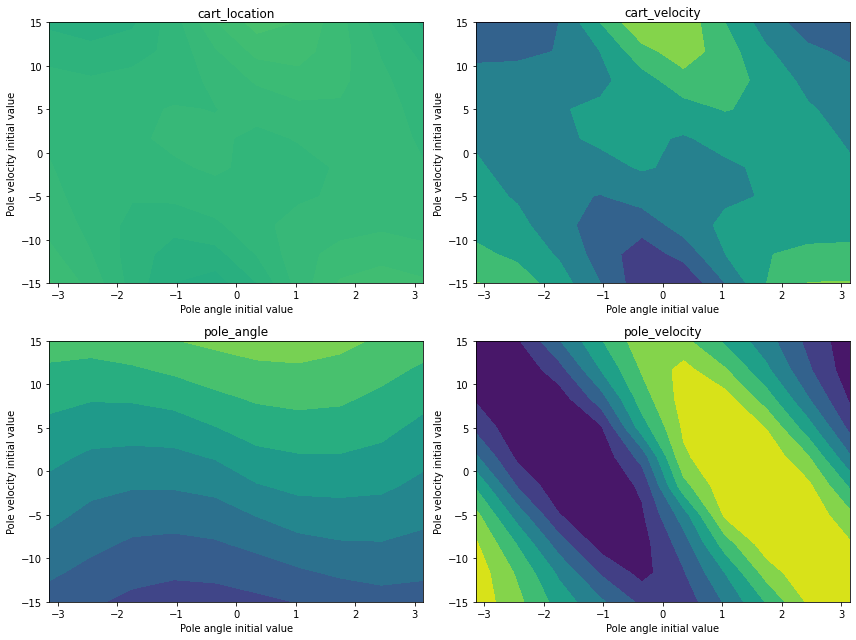

In [22]:
for index_pair in different_pairs:
     print('_____________________Plots of {} vs {}_____________________'.format(variable_number[index_pair[0]],variable_number[index_pair[1]]))
     contours_of_pairs(index_pair, axes_for_pairs(index_pair))
     plt.show()
     plt.close()

## Task 1.3

In [23]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [24]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[ 3.68170179,  4.20519458, -2.63047011,  9.22612798],
        [-4.78034706,  7.11677231,  3.05770141,  2.56754659],
        [ 3.31541953,  0.5548595 , -0.99111682,  9.4083982 ],
        [ 3.7531438 ,  5.69606782,  0.91980656, 10.80640242],
        [-3.56608592, -1.14447079, -1.85630616, -0.54715311]]),
 array([[ 0.68455677, -1.18449872,  1.24360686, -5.9239948 ],
        [ 1.41268623, -0.189394  , -5.84762279, -1.41634654],
        [ 0.04058965, -0.29563175,  1.62664216, -0.98125943],
        [ 1.48426759,  2.68365495, -3.57384792,  4.18904873],
        [-0.27641817, -0.64703415, -0.69551519, -5.63668366]]))

In [25]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [26]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
m=model.predict(test_x)

### First plot. Real and predicted plotted against initial

In [27]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step plotted against various initial values')
    fig.tight_layout()

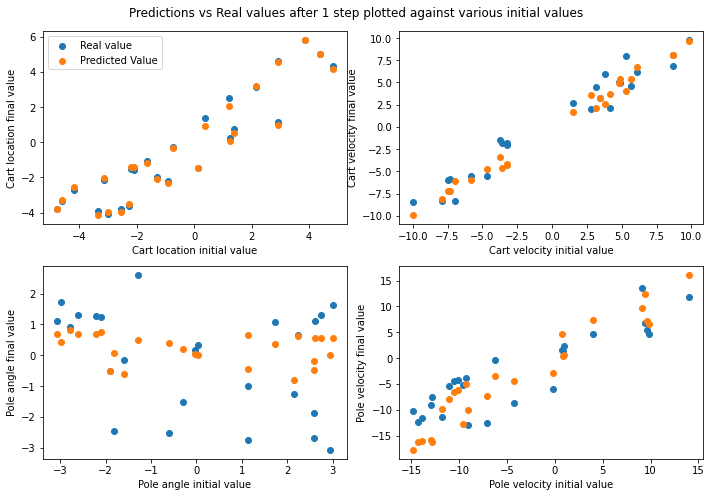

In [28]:
vertical_plot(test_x,test_y+test_x,m+test_x)

### second plot. This one is real vs predicted only

In [29]:
def real_vs_predicted(real,predicted):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in real],[y[0] for y in predicted])
   
    axs[0,0].set_xlabel('Cart location real value')
    axs[0,0].set_ylabel('Cart location predicted value')
    

    axs[0,1].scatter([x[1] for x in real],[y[1] for y in predicted])
    axs[0,1].set_xlabel('Cart velocity real value')
    axs[0,1].set_ylabel('Cart velocity predicted value')

    axs[1,0].scatter([x[2] for x in real],[y[2] for y in predicted])
    axs[1,0].set_xlabel('Pole angle real value')
    axs[1,0].set_ylabel('Pole angle predicted value')

    axs[1,1].scatter([x[3] for x in real],[y[3] for y in predicted])
    axs[1,1].set_xlabel('Pole velocity real value')
    axs[1,1].set_ylabel('Pole velocity predicted value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

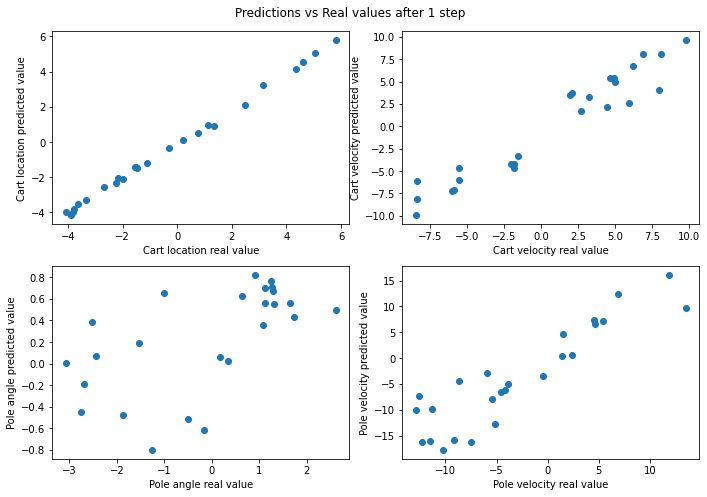

In [30]:
real_vs_predicted(test_y+test_x,m+test_x)

### Scans with varying parameters

In [31]:
def one_step_difference_with_predictions(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        pred = model.predict([x])
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(y)
            final_pred = np.array(pred)
   
   
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location change')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity change')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle change')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity change')

    fig.suptitle(('Effect of varying initial {} on cart dynamics (predicted and real) after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location

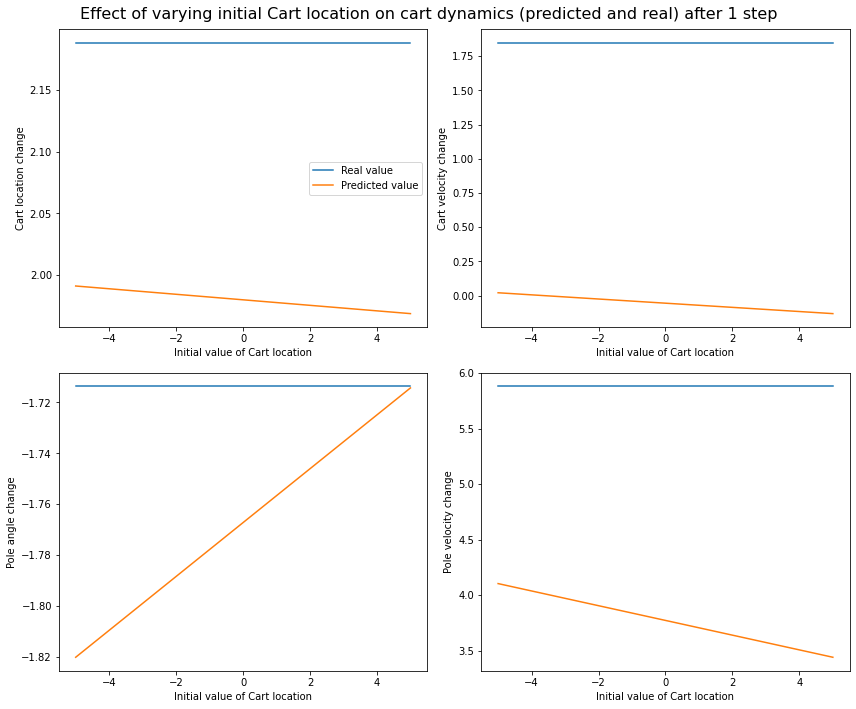

In [32]:
one_step_difference_with_predictions(0,[-5,5],15)

### Vary cart velocity

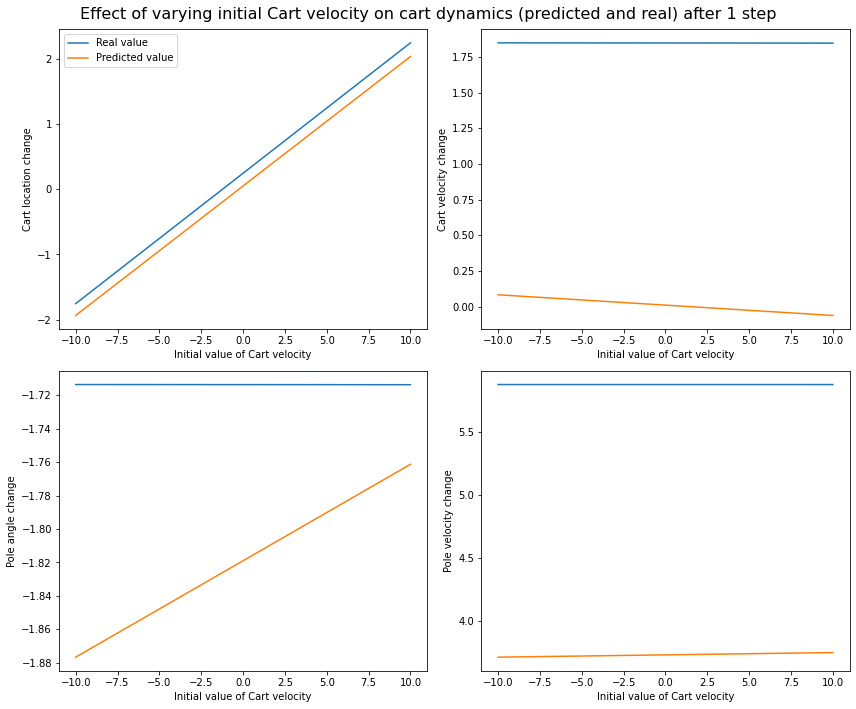

In [33]:
one_step_difference_with_predictions(1,[-10,10],15)

### Vary pole angle

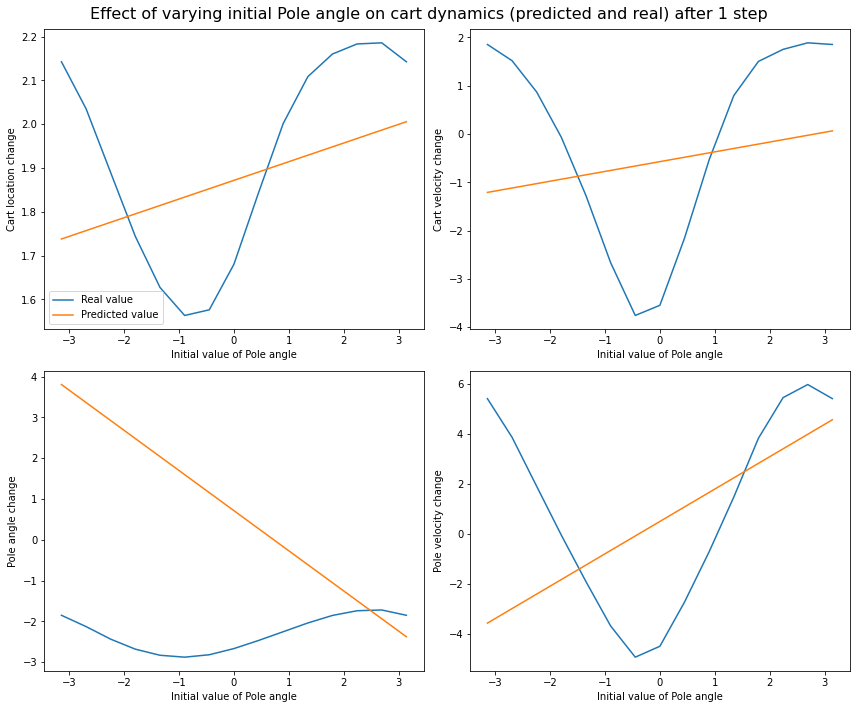

In [34]:
one_step_difference_with_predictions(2,[-np.pi,np.pi],15)

### Vary pole velocity

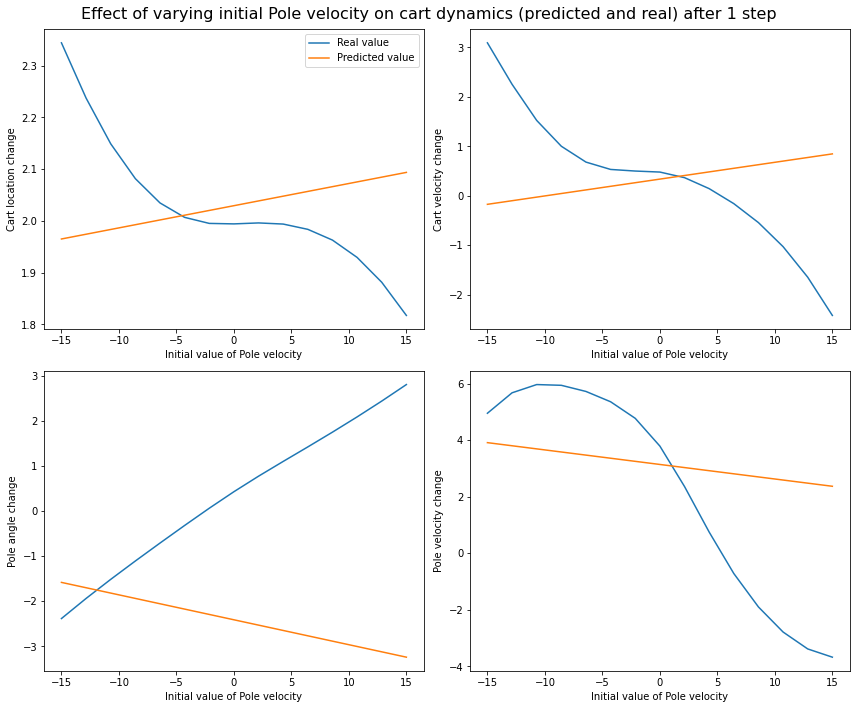

In [36]:
one_step_difference_with_predictions(3,[-15,15],15)

## Task 1.4

In [65]:
def future_predictions(initial_conditions, time_steps):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)
    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=True)
        pred = model.predict([final_pred[i]])
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

    

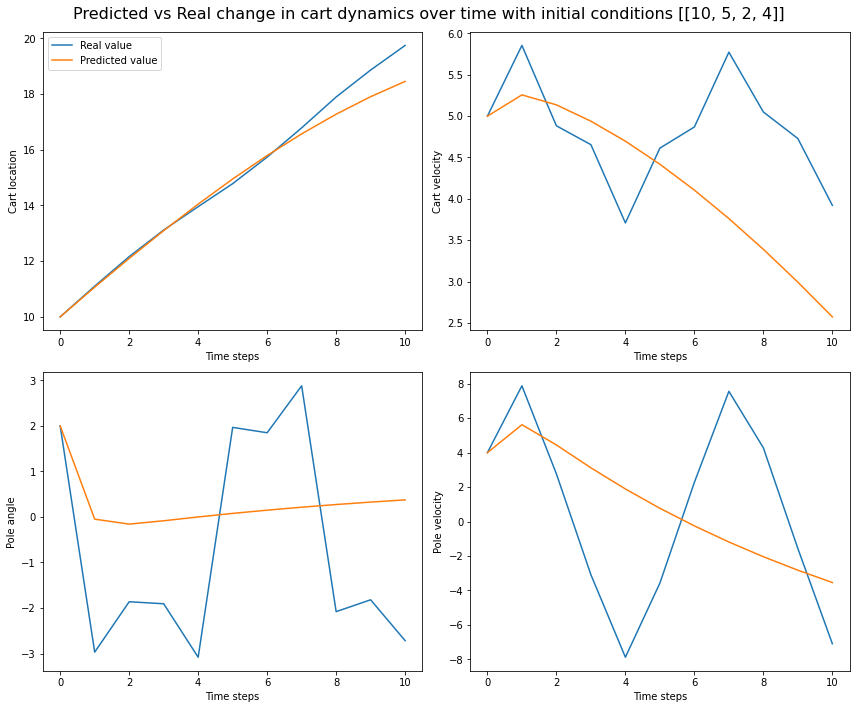

In [67]:
future_predictions([[10,5,2,4]],10)

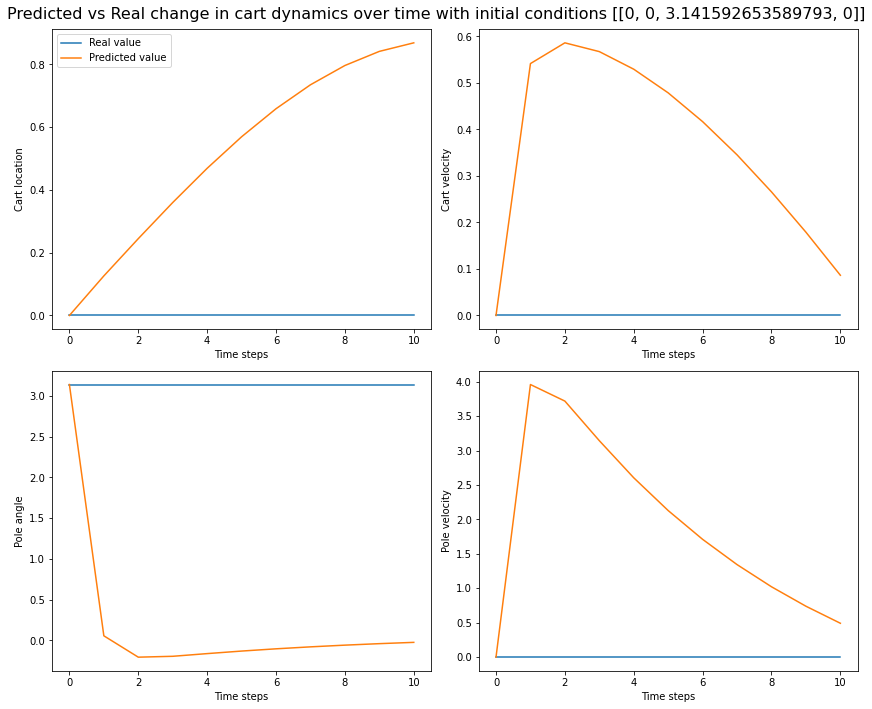

In [68]:
future_predictions([[0,0,np.pi,0]],10)